In [581]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [582]:
df = pd.read_csv('./clean/cleaned_features.csv')
df.columns

Index(['Unnamed: 0', 'outcome', 'time', 'fights_f1', 'fights_f2',
       'win_proportion_f1', 'win_proportion_f2', 'height_diff', 'reach_diff',
       'weightclass_flw', 'weightclass_ftw', 'weightclass_hw',
       'weightclass_lhw', 'weightclass_lw', 'weightclass_mw',
       'weightclass_wbw', 'weightclass_wflw', 'weightclass_wsw',
       'weightclass_ww', 'round_2', 'round_3', 'round_4', 'round_5',
       'stance_x_Orthodox', 'stance_x_Switch', 'stance_y_Orthodox',
       'stance_y_Switch'],
      dtype='object')

In [583]:
df.head()

,Unnamed: 0,outcome,time,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_diff,reach_diff,weightclass_flw,...,weightclass_wsw,weightclass_ww,round_2,round_3,round_4,round_5,stance_x_Orthodox,stance_x_Switch,stance_y_Orthodox,stance_y_Switch
0,0,0.0,300,5.0,5.0,0.200000,0.4,-1.0,1.0,0,...,0,0,0,0,0,1,1,0,1,0
1,1,1.0,300,6.0,5.0,0.166667,0.4,-2.0,1.0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,0.0,292,5.0,5.0,0.400000,0.4,-1.0,-1.0,0,...,0,0,1,0,0,0,1,0,1,0
3,3,1.0,300,7.0,5.0,0.571429,0.4,-3.0,2.0,0,...,0,0,0,1,0,0,1,0,1,0
4,4,0.0,300,1.0,5.0,1.000000,0.4,-2.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [584]:
#We will not know the time at the time of prediction, so dropping it for now

df.drop(['Unnamed: 0','time'], axis=1, inplace=True)

In [585]:
#Creates y and X variables
y= df['outcome'] #Outcome = 1 means figher 1 won, Outcome = 2 means fighter 2 won
X = df.loc[:, df.columns != 'outcome']

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

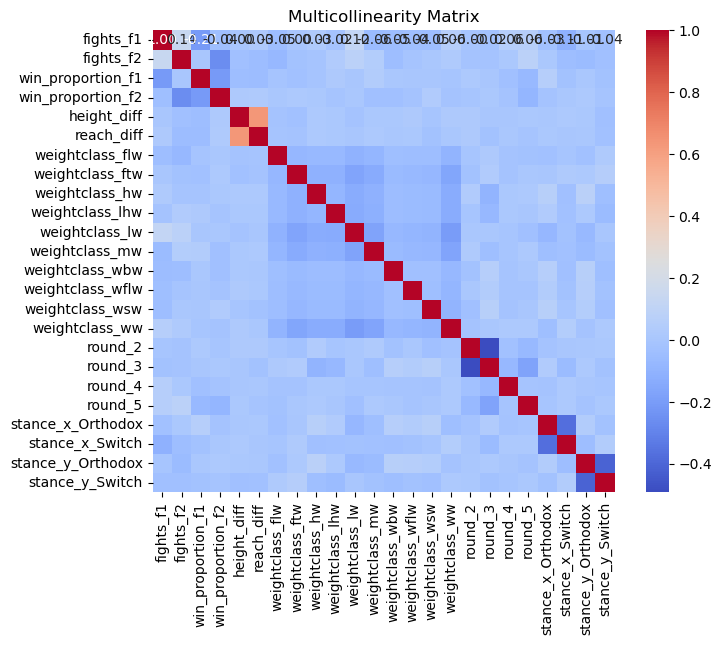

In [586]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Multicollinearity Matrix')
plt.show()

In [587]:
corr_matrix

,fights_f1,fights_f2,win_proportion_f1,win_proportion_f2,height_diff,reach_diff,weightclass_flw,weightclass_ftw,weightclass_hw,weightclass_lhw,...,weightclass_wsw,weightclass_ww,round_2,round_3,round_4,round_5,stance_x_Orthodox,stance_x_Switch,stance_y_Orthodox,stance_y_Switch
fights_f1,1.000000,0.139250,-0.207912,-0.042247,0.001321,0.025157,-0.047860,0.001136,0.029073,-0.016869,...,-0.047691,0.061103,-0.003586,-0.022759,0.059074,0.061248,-0.030913,-0.111707,-0.007817,-0.036964
fights_f2,0.139250,1.000000,0.002233,-0.263210,-0.031913,-0.053467,-0.074927,-0.025352,-0.010835,0.034318,...,0.003928,0.028304,-0.015410,-0.013920,0.010198,0.082746,0.013169,-0.046716,-0.055644,-0.035279
win_proportion_f1,-0.207912,0.002233,1.000000,-0.206528,-0.043232,-0.054206,-0.012643,-0.025867,-0.011292,0.023057,...,0.003539,-0.006642,0.020300,-0.001740,-0.033400,-0.068501,0.056355,-0.021506,0.004291,-0.020316
win_proportion_f2,-0.042247,-0.263210,-0.206528,1.000000,0.022820,0.028486,0.007246,0.020138,0.012902,-0.013759,...,0.034837,-0.017018,-0.003102,0.010103,-0.013875,-0.086191,-0.016403,0.009142,0.018251,-0.009549
height_diff,0.001321,-0.031913,-0.043232,0.022820,1.000000,0.637836,-0.018113,-0.030276,0.019952,0.010878,...,-0.007238,0.021248,0.023448,-0.001030,0.000862,0.010921,0.006385,0.017838,0.011736,-0.032434
reach_diff,0.025157,-0.053467,-0.054206,0.028486,0.637836,1.000000,-0.009981,-0.014423,0.016028,0.011714,...,-0.023517,0.008154,0.023742,-0.021176,0.009073,-0.008625,0.009645,0.002243,0.007013,-0.030758
weightclass_flw,-0.047860,-0.074927,-0.012643,0.007246,-0.018113,-0.009981,1.000000,-0.082387,-0.066542,-0.067800,...,-0.048175,-0.100408,-0.002692,0.022650,-0.014652,-0.022748,-0.029341,-0.003204,-0.029783,0.028808
weightclass_ftw,0.001136,-0.025352,-0.025867,0.020138,-0.030276,-0.014423,-0.082387,1.000000,-0.108205,-0.110251,...,-0.078339,-0.163275,-0.019724,0.037771,-0.014223,0.008425,0.002917,0.032482,0.016145,0.053655
weightclass_hw,0.029073,-0.010835,-0.011292,0.012902,0.019952,0.016028,-0.066542,-0.108205,1.000000,-0.089046,...,-0.063272,-0.131872,0.033837,-0.100601,0.014962,0.017082,0.067607,-0.035236,0.073970,-0.038255
weightclass_lhw,-0.016869,0.034318,0.023057,-0.013759,0.010878,0.011714,-0.067800,-0.110251,-0.089046,1.000000,...,-0.064468,-0.134366,-0.002716,-0.072335,0.014066,0.000882,0.035585,-0.029840,0.021030,-0.055786


In [588]:
import statsmodels.api as sm

#Log regression similar to glm in R
# Add a constant term for the intercept
b = sm.add_constant(X_train_orig)
log_reg = sm.Logit(y_train, X_train_orig).fit(maxiter=2000) 

# printing the summary table 
print(log_reg.summary()) 
p_values=log_reg.pvalues
# Select significant features with p-values less than 0.05
significant_features = X_train_orig.columns[p_values < 0.05]

print("Significant features:")
print(significant_features)

Optimization terminated successfully.
         Current function value: 0.356344
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                 3483
Model:                          Logit   Df Residuals:                     3459
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 Apr 2024   Pseudo R-squ.:                  0.4774
Time:                        05:04:34   Log-Likelihood:                -1241.1
converged:                       True   LL-Null:                       -2374.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
fights_f1             0.0198      0.010      1.895      0.058      -0.001       0.040
fights_f

In [599]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

def find_best_model(X_train, y_train, models):
    best_models = {}
    
    for model_name, model in models.items():
        print(f"Searching for best {model_name}...")
        
        # Define parameter grid for each model
        param_dist = {}
        if model_name == 'Logistic Regression':
            param_dist = {
                'C': np.logspace(-3, 3, 7),
                'penalty': ['l2']
            }
        elif model_name == 'SVM':
            param_dist = {
                'C': np.logspace(-3, 3, 7),
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }
        elif model_name == 'Random Forest Classifier':
            param_dist = {
                "n_estimators": randint(100, 1000),
                "max_features": ['auto', 'sqrt', 'log2'],
                "max_depth": [None] + list(range(5, 30)),
                "min_samples_split": randint(2, 20),
                "min_samples_leaf": randint(1, 20),
                "bootstrap": [True, False]
            }
        elif model_name == 'MLP Classifier':
            param_dist = {
                'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
                'activation': ['relu', 'tanh', 'logistic'],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate': ['constant', 'invscaling', 'adaptive']
            }
        
        # Create RandomizedSearchCV object
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=5, scoring='accuracy',
                                           verbose=1, random_state=42, n_jobs=-1)
        
        # Fit RandomizedSearchCV object to the data
        random_search.fit(X_train, y_train)
        
        # Print best parameters and score
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best accuracy for {model_name}: {random_search.best_score_}\n")
        
        # Save best model
        best_models[model_name] = random_search.best_estimator_

        # Add a hard voting classifier
    voting_classifier = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='hard')
    
    voting_classifier.fit(X_train, y_train)
    best_models['Voting Classifier (Hard)'] = voting_classifier
    
    return best_models

# Example usage
best_models = find_best_model(X_train, y_train, {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'MLP Classifier': MLPClassifier()
})


Searching for best Logistic Regression...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 0.01}
Best accuracy for Logistic Regression: 0.8283039792872573

Searching for best SVM...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVM: {'kernel': 'linear', 'C': 1.0}
Best accuracy for SVM: 0.8268704958854862

Searching for best Random Forest Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': 24, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 558}
Best accuracy for Random Forest Classifier: 0.8225655106449645

Searching for best MLP Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for MLP Classifier: {'learning_rate': 'invscaling', 'hidden_layer_sizes': (100, 50, 100), 'alpha': 0.001, 'activation': 

In [597]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
def sensitivity_specificity(y_true, y_pred):
    """
    Calculate sensitivity and specificity.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        
    Returns:
        sensitivity (float): Sensitivity (true positive rate).
        specificity (float): Specificity (true negative rate).
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity
    
def evaluate_best_models(X_test, y_test, best_models):
    evaluation_results = {}
    
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        sensitivity, specificity=sensitivity_specificity(y_test, y_pred)
        cm=confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        evaluation_results[model_name] = {
            'accuracy': accuracy,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'confusion_matrix':cm,
            'precision':precision,
            'recall':recall
        }
        
        print(f"Evaluation results for {model_name}:")
        print(f"Accuracy: {accuracy}")
        print(f"sensitivity: {sensitivity}")
        print(f"specificity: {specificity}")    
        print(f"precision: {precision}")
        print(f"recall: {recall}")
        print(f"confusion: {cm}")
        print(f"classification report: {classification_rep}")
    return evaluation_results

# Example usage
evaluation_results = evaluate_best_models(X_test, y_test, best_models)


Evaluation results for Logistic Regression:
Accuracy: 0.822623828647925
sensitivity: 0.8586698337292161
specificity: 0.7760736196319018
precision: 0.8319907940161104
recall: 0.8586698337292161
confusion: [[506 146]
 [119 723]]
classification report:               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       652
         1.0       0.83      0.86      0.85       842

    accuracy                           0.82      1494
   macro avg       0.82      0.82      0.82      1494
weighted avg       0.82      0.82      0.82      1494

Evaluation results for SVM:
Accuracy: 0.8192771084337349
sensitivity: 0.8562945368171021
specificity: 0.7714723926380368
precision: 0.828735632183908
recall: 0.8562945368171021
confusion: [[503 149]
 [121 721]]
classification report:               precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       652
         1.0       0.83      0.86      0.84       842

    accuracy             

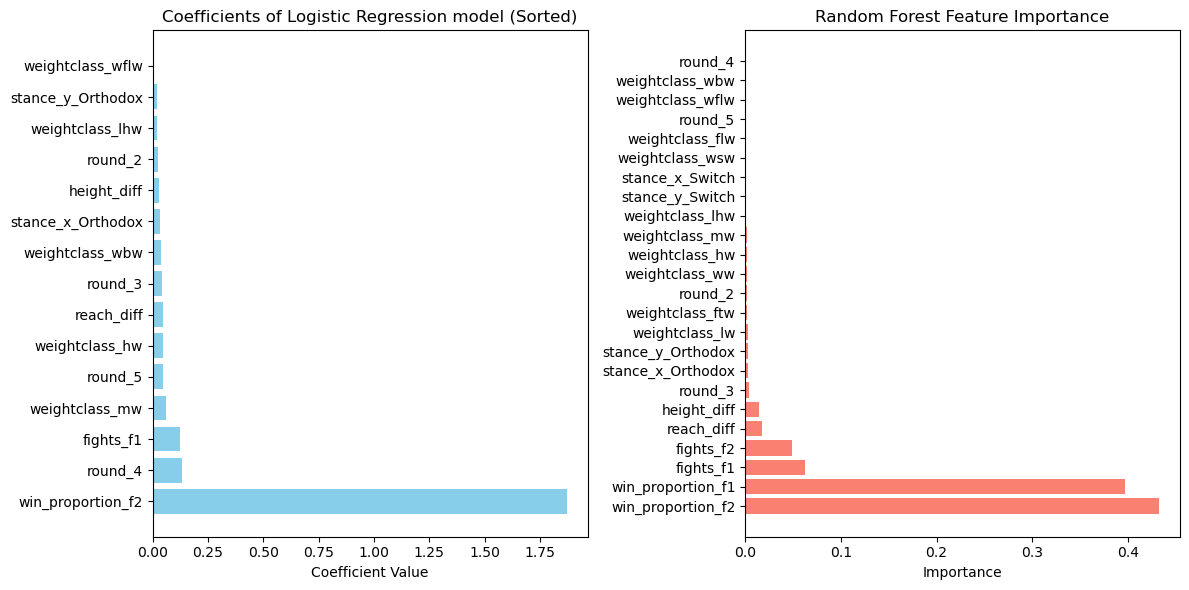

In [592]:
feature_names=X.columns
# Get feature importance for Logistic Regression
lasso_coefficients = best_models['Logistic Regression'].coef_[0]
lasso_feature_names = feature_names

# Filter coefficients and feature names where coefficient is greater than zero
selected_coefficients = [coef for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]
selected_feature_names = [name for coef, name in zip(lasso_coefficients, lasso_feature_names) if coef > 0]

# Sort the coefficients and feature names based on coefficients
sorted_indices = np.argsort(selected_coefficients)[::-1]
sorted_coefficients = [selected_coefficients[i] for i in sorted_indices]
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]

# Get feature importance for Random Forest
rf_importance = best_models['Random Forest Classifier'].feature_importances_
sorted_indices_rf = np.argsort(rf_importance)[::-1]

#

# Plot the coefficients
# Plot feature importance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Logistic Regression model (Sorted)')

plt.subplot(1, 2, 2)
plt.barh([feature_names[i] for i in sorted_indices_rf], rf_importance[sorted_indices_rf], color='salmon')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()